In [21]:
import numpy as np
import pandas as pd

df = pd.read_csv('train_set.csv')
df.head(4)


,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323


In [22]:
df.shape

(287836, 15)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287836 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287836 non-null  int64  
 1   OGC                 287836 non-null  int64  
 2   OG                  287836 non-null  object 
 3   DC                  287836 non-null  object 
 4   Dept                287836 non-null  object 
 5   UC                  287836 non-null  int64  
 6   Union               287800 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287836 non-null  object 
 9   EI                  287836 non-null  int64  
 10  Salaries            287836 non-null  int64  
 11  Overtime            287836 non-null  int64  
 12  H/D                 287836 non-null  float64
 13  YT                  287836 non-null  object 
 14  Total_Compensation  287836 non-null  int64  
dtypes: float64(1), int64(7), object(7)

In [24]:
df.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [25]:
df.columns

Index(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI',
       'Salaries', 'Overtime', 'H/D', 'YT', 'Total_Compensation'],
      dtype='object')

In [26]:
df1 = df.drop(['Year','OGC','OG','DC','Dept','UC','Union','JF','Job','EI','H/D','YT'], axis = 1)


In [27]:
df1.isnull().sum()

Salaries              0
Overtime              0
Total_Compensation    0
dtype: int64

<Figure size 1000x500 with 0 Axes>

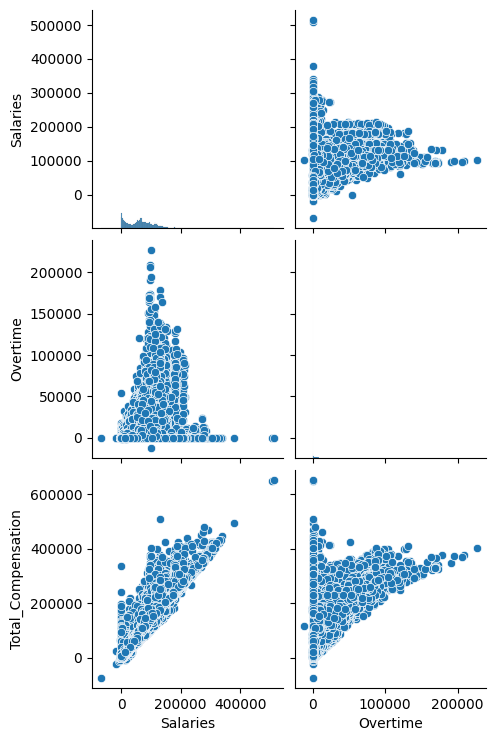

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
sns.pairplot(df1, x_vars = ['Salaries','Overtime'])

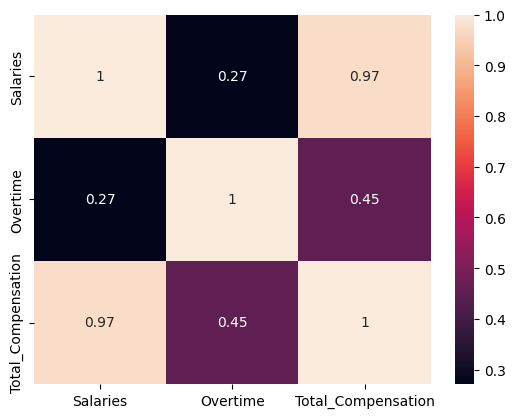

In [29]:
sns.heatmap(df1.corr(), annot = True)
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df1.drop('Total_Compensation', axis = 1)
Y = df1['Total_Compensation']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)


In [33]:
lr = LinearRegression()

In [34]:
import statsmodels.api as sm

In [35]:
X_train_sm = sm.add_constant(X_train)      
lr = sm.OLS(Y_train, X_train_sm).fit()  

In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 6.383e+06
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:42:49   Log-Likelihood:            -2.1076e+06
No. Observations:              201485   AIC:                         4.215e+06
Df Residuals:                  201482   BIC:                         4.215e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4418.2189     32.647    135.332      0.0

In [38]:
lr.params

const       4418.218949
Salaries       1.392334
Overtime       1.248357
dtype: float64

ValueError: x and y must be the same size

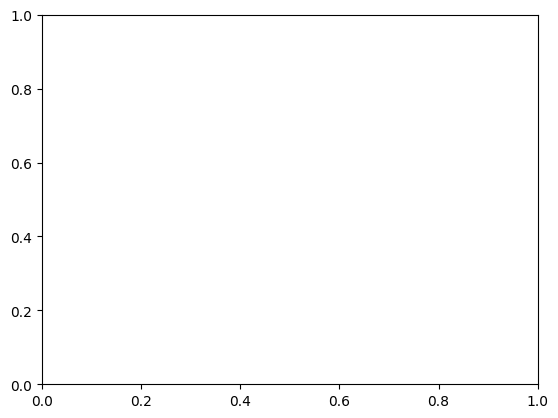

In [40]:
X_train_1 = X_train.iloc[:,:1]
plt.scatter(X_train, Y_train)
plt.plot(X_train_1, 4418.218949 + 1.392334*X_train_1, 'r')
plt.show()                   

In [ ]:
X_train_2 = X_train.iloc[:, -1:]
plt.scatter(X_train_2, Y_train)
plt.plot(X_train_2, 4418218949 + 1.128357*X_train_2, 'r')
plt.show()